In [444]:
import pandas as pd
from tqdm import tqdm
import ast
import seaborn as sns

In [3]:
df = pd.read_csv('../data/nigerian_presidential_election_2023_tweets.csv')
df.shape

/var/folders/4g/hs1pvbs91s51566rjl0254qm0000gn/T/ipykernel_27899/1641326329.py:1: DtypeWarning: Columns (0,5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/nigerian_presidential_election_2023_tweets.csv')


(85652, 16)

In [7]:
df[df['text'].str.lower().str.contains('obi') == True]

66532    History was made.#electionresults2023 #PeterOb...
19346    ♨️BREAKING ♨️\nSeun :did you hear about some L...
24773    I have witnessed both ObiDatti and Tinubu's ca...
20283    @YarKafanchan Weldon, keep the fire burning, w...
10673    Everyone kindly go get your PVCs so we can vot...
20145    Labour Party is the party, ⁦@PeterObi⁩ is the ...
34192    The way Nigerians are talking about #Obi, I ho...
31646    Vote wisely means vote Peter Obi. Simple. Vote...
7556     @PeterObi I never see person way dem put horny...
33051    I agree with this guy. I am a strong and great...
Name: text, dtype: object

In [445]:
def get_candidates(x):
    candidates = ['obi','abubakar','tinubu','kwankwaso']
    listy = []
    for y in candidates:
        if type(x) == str:
            if y in str(x.lower()):
                listy += [y]
        else:
            pass
    return listy

df['candidates'] = df.text.apply(get_candidates)

In [446]:
df['candidates'].value_counts()

[]                                    58615
[obi]                                 17397
[tinubu]                               6991
[obi, tinubu]                          2002
[abubakar]                              227
[kwankwaso]                             158
[obi, kwankwaso]                         84
[obi, tinubu, kwankwaso]                 58
[abubakar, tinubu]                       39
[tinubu, kwankwaso]                      23
[obi, abubakar]                          19
[obi, abubakar, tinubu]                  18
[obi, abubakar, tinubu, kwankwaso]        8
[abubakar, kwankwaso]                     2
Name: candidates, dtype: int64

In [23]:
from transformers import pipeline
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

In [40]:
def add_sentiment(df):
    sentiment = []
    for idx in tqdm(range(len(df))):
        df.text.iloc[idx]
        sentiment.append(sentiment_pipeline([df.text.iloc[idx]]))
    return [[x[0]['label'],x[0]['score']] for x in sentiment]

sentiment = add_sentiment(df)


100%|██████████| 85641/85641 [1:50:55<00:00, 12.87it/s]    


In [44]:
len(sentiment) == len(df)

True

In [ ]:
df['sentiment'],df['score'] = [x[0] for x in sentiment],[x[1] for x in sentiment]
# df.to_csv('../data/clean_data.csv')

In [452]:
dff = pd.read_csv('../data/clean_data.csv')

/var/folders/4g/hs1pvbs91s51566rjl0254qm0000gn/T/ipykernel_27899/1554471502.py:1: DtypeWarning: Columns (1,6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  dff = pd.read_csv('../data/clean_data.csv')


In [453]:
def standardize_user_location(place):
    place_dict = {
        'Nigeria':'Nigeria',
        'Lagos, Nigeria': 'Lagos',
        'Abuja, Nigeria': 'Abuja',
        'UK, USA, South Africa, Nigeria':'International',
        'Federal Capital Territory, Nig':'Abuja',
        'Port Harcourt, Nigeria':'Port Harcourt',
        'London, England': 'International',
        'Lagos Nigeria':'Lagos',
        'Earth':'International',
        'United Kingdom':'International',
        'London':'International',
        'Africa':'International',
        'Ibadan, Nigeria': 'Ibadan',
        'Enugu, Nigeria':'Enugu',
        'United States':'International',
        'NIGERIA':'Nigeria',
        'Berkeley, CA / Ohlone Land':'International',
        'Somewhere in the World 🌎🌍':'International',
        'Kaduna, Nigeria':'Kaduna',
        'Gombe, Nigeria':'Gombe',
        'Worldwide':'International',
        'Romania':'International',
        'Planet Mars':'International',
        'Everywhere':'International',
        'Owerri, Nigeria':'Owerri',
        'Kano, Nigeria':'Kano',
        'Jos, Nigeria':'Jos',
        'Accra, Ghana':'International',
        'Rivers, Nigeria':'International',
        'Somewhere in the world':'International',
        'Surulere, Lagos':'Lagos',
        'England, United Kingdom':'International',
        'Atlanta, GA':'International',
        'Anambra, Nigeria':'Anambra'
    }

    if place in set(place_dict.keys()):
        name = place_dict[place]
    else:
        name = 'Other'
    return name
    

In [454]:
dff.head()

,Unnamed: 0,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,candidates,sentiment,score
0,0,1617619263392743424,Fabulous Faga,"Abakaliki, Nigeria",🌹A Social media influencer\n💃A scientist by pr...,2020-10-19 08:02:47+00:00,244,999,686,False,2023-01-23 20:24:20+00:00,#OBI and #wife storm kastina state today.\n\nS...,"['OBI', 'wife']",Twitter for Android,0.0,5.0,False,['obi'],POS,0.913718
1,1,1617648566977302534,Patriotic Nigerian,"Lagos, Nigeria",inspiring and amazingly created. Marketing/ Br...,2021-03-30 22:04:11+00:00,688,2827,3488,False,2023-01-23 22:20:47+00:00,"If they can’t point to you one project , inves...","['peterobi', 'Atiku']",Twitter for iPhone,11.0,15.0,False,['obi'],NEU,0.603006
2,2,1617657018873171969,Promise,NaN,Health and Fitness enthusiast,2022-05-06 23:03:08+00:00,2,22,40,False,2023-01-23 22:54:22+00:00,@atiku God with his infinite mercy will never ...,NaN,Twitter for iPhone,0.0,0.0,False,[],NEU,0.716170
3,3,1617584206317752321,KemKem,"Lagos, Nigeria",My Tweets & Views are Personal & do not\nrefle...,2015-01-01 07:40:09+00:00,24474,1931,129947,False,2023-01-23 18:05:02+00:00,Governor @RotimiAkeredolu takes Asiwaju Bola A...,NaN,Twitter for Android,14.0,40.0,False,['tinubu'],NEU,0.968125
4,4,1617619489184690178,Mo'6icky,NaN,"By nature, an optimist_📌",2019-05-09 16:31:33+00:00,22,198,540,False,2023-01-23 20:25:14+00:00,@atiku Salutation is not Love. #Obi is coming,['Obi'],Twitter for Android,0.0,4.0,False,['obi'],NEG,0.756692


In [455]:
dff['candidates'] = dff['candidates'].apply(lambda l: " ".join(ast.literal_eval(l)))
dff = dff[dff['candidates'].str.split().str.len()==1]
dff['count'] = 1
dff['positive'] = [1 if x == 'POS' else 0 for x in dff['sentiment']]
dff['negative'] = [1 if x == 'NEG' else 0 for x in dff['sentiment']]
dff['neutral'] = [1 if x == 'NEU' else 0 for x in dff['sentiment']]
dff['obi'] = [1 if x == 'obi' else 0 for x in dff['candidates']]
dff['abubakar'] = [1 if x == 'abubakar' else 0 for x in dff['candidates']]
dff['kwankwaso'] = [1 if x == 'kwankwaso' else 0 for x in dff['candidates']]
dff['tinubu'] = [1 if x == 'tinubu' else 0 for x in dff['candidates']]
dff = dff[dff['candidates'].str.split().str.len()==1]
dff['user_location'] = dff['user_location'].str.strip()
dff['user_location'] = [standardize_user_location(place) for place in dff.user_location]


In [464]:
count = dff.candidates.value_counts(normalize=True).reset_index()
count_df = pd.DataFrame(count).rename(columns={'index':'candidates','candidates':'percentage_tweets'})
count_df['election_results'] = [0.2540,0.3661,0.2907,0.0640]

<Axes: xlabel='candidates'>

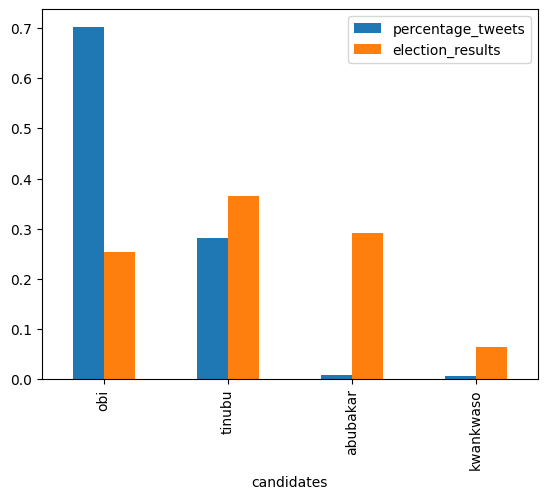

In [466]:
count_df.plot(x="candidates", y=['percentage_tweets','election_results'], kind="bar")

In [374]:
dff = dff[dff['score']>.8]

In [440]:
group = dff[dff['candidates'].str.split().str.len()==1][['candidates','positive','negative','neutral','obi','kwankwaso','abubakar','tinubu']].groupby(['candidates']).mean()
group['election_results'] = [0.2907,0.0640,0.2540,0.3661]
group['net_positivity'] = group['positive'] - group['negative']

In [463]:
group = group.reset_index()
group



,index,candidates,positive,negative,neutral,obi,kwankwaso,abubakar,tinubu,election_results,net_positivity
0,0,abubakar,0.425000,0.068750,0.506250,0.0,0.0,1.0,0.0,0.2907,0.356250
1,1,kwankwaso,0.233645,0.112150,0.654206,0.0,1.0,0.0,0.0,0.0640,0.121495
2,2,obi,0.404791,0.108748,0.486461,1.0,0.0,0.0,0.0,0.2540,0.296042
3,3,tinubu,0.289925,0.154264,0.555811,0.0,0.0,0.0,1.0,0.3661,0.135661


<Axes: xlabel='candidates'>

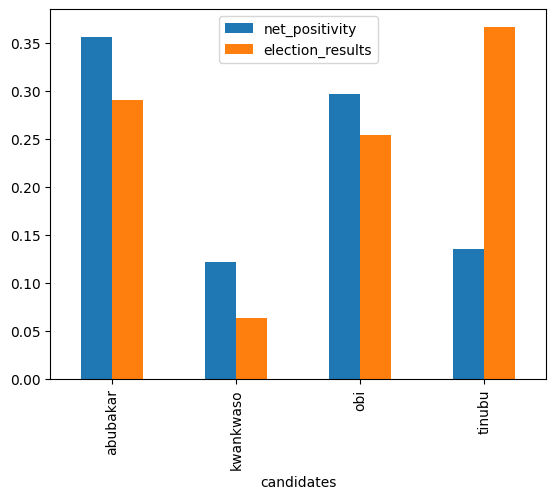

In [443]:
group.plot(x="candidates", y=['net_positivity','election_results'], kind="bar")

In [436]:
group_2 = dff[dff.groupby('user_location')['id'].transform('nunique') > 50].groupby(['candidates','user_location']).mean()[['positive','negative']].reset_index()
group_2.reset_index()
group_2['net_positivity'] = group_2['positive'] - group_2['negative']

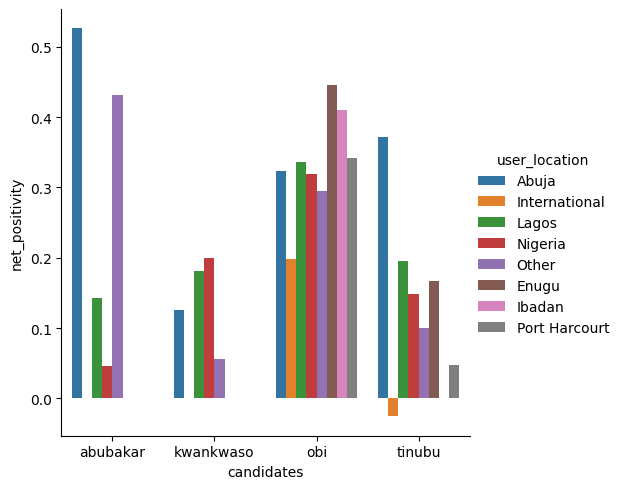

In [439]:
sns.catplot(x='candidates', y='net_positivity', hue='user_location', data=group_2, kind='bar')